In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [28]:
attrition = pd.read_csv("IBM Attrition Data.csv")

In [29]:
attrition

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


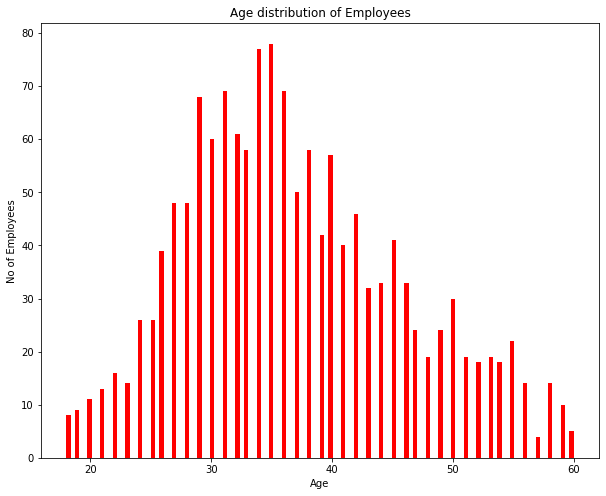

In [30]:
plt.figure(figsize=(10,8))
plt.hist(attrition.Age,bins=120, color="red");
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("No of Employees")
plt.show()

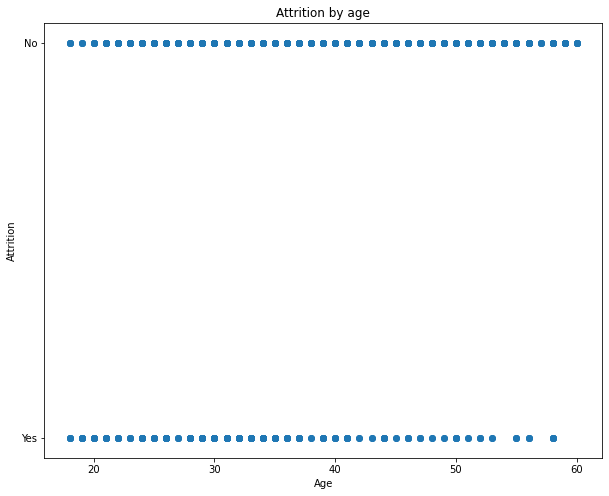

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(attrition.Age, attrition.Attrition)
plt.title("Attrition by age")
plt.xlabel("Age")
plt.ylabel("Attrition")
plt.show()

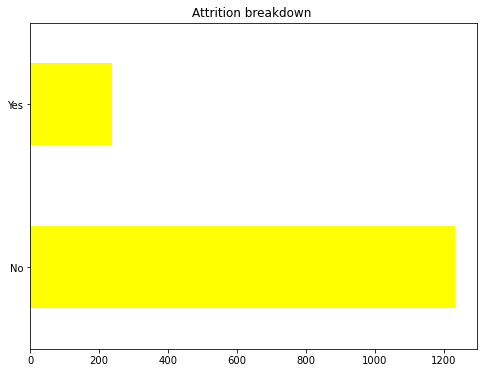

In [32]:
plt.figure(figsize=(8,6))
attrition.Attrition.value_counts().plot(kind="barh",color = "yellow")
plt.title("Attrition breakdown ")
plt.show()

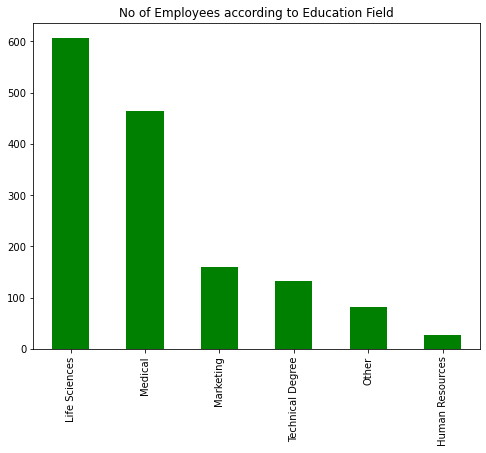

In [33]:
plt.figure(figsize=(8,6))
attrition.EducationField.value_counts().plot(kind="bar",color="green")
plt.title("No of Employees according to Education Field")
plt.show()

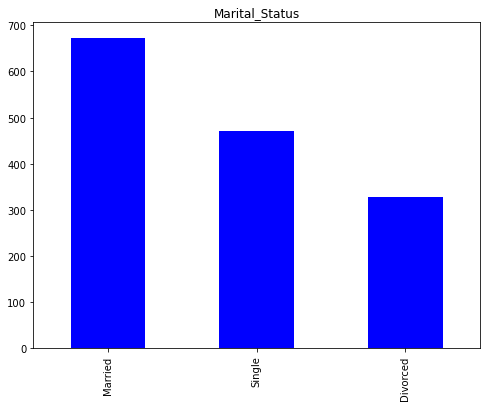

In [34]:
plt.figure(figsize=(8,6))
attrition.MaritalStatus.value_counts().plot(kind="bar",color="blue")
plt.title("Marital_Status")
plt.show()

In [35]:
attrition.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [36]:
attrition.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [37]:
attrition.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [38]:
attrition.Attrition.replace(('Yes','No'),(1,0),inplace=True)

In [39]:
attrition

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,0,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,0,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,0,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [40]:
attrition.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [41]:
attrition.Department.replace(('Research & Development','Sales','Human Resources'),(1,2,3), inplace=True)

In [42]:
attrition

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,1,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,1,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,1,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,1,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,0,1,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,0,1,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,0,2,2,3,Medical,4,2,Married,5390,2,2,9


In [43]:
attrition.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [71]:
attrition.EducationField.replace(('Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'),(0,1,2,3,4,5),inplace=True)

In [72]:
attrition.MaritalStatus.replace(('Married','Single','Divorced'),(0,1,2),inplace=True)

In [73]:
attrition


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,0,2,4,1,5993,8,1,6
1,49,0,1,8,1,0,3,2,0,5130,1,3,10
2,37,1,1,2,2,4,4,3,1,2090,6,3,0
3,33,0,1,3,4,0,4,3,0,2909,1,3,8
4,27,0,1,2,1,1,1,2,0,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,23,2,1,3,4,0,2571,4,3,5
1466,39,0,1,6,1,1,4,1,0,9991,4,3,7
1467,27,0,1,4,3,0,2,2,0,6142,1,3,6
1468,49,0,2,2,3,1,4,2,0,5390,2,2,9


In [78]:
X = attrition.drop('Attrition',axis=1)
Y = attrition.Attrition

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42,stratify=Y)

In [80]:
y_test.value_counts()

0    247
1     47
Name: Attrition, dtype: int64

In [81]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

/Users/shubhamswarnakar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
logistic.score(x_train,y_train)

0.8375850340136054

In [83]:
logistic.score(x_test,y_test)

0.8367346938775511

In [86]:
y_pred = logistic.predict(x_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
confusion_matrix(y_train,y_pred)

array([[983,   3],
       [188,   2]])

In [89]:
classification_report(y_train,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.91       986\n           1       0.40      0.01      0.02       190\n\n    accuracy                           0.84      1176\n   macro avg       0.62      0.50      0.47      1176\nweighted avg       0.77      0.84      0.77      1176\n'